# Predicting House Prices - Advanced Regression Techniques

## Introduction

<img src="https://storage.googleapis.com/kaggle-media/competitions/House%20Prices/kaggle_5407_media_housesbanner.png">

Welcome to our deep dive into the world of real estate pricing! Have you ever wondered what factors influence the price of a house? Maybe you have thought about how different features like number of bedrooms or size of the yard play a role. In this project, we will explore a dataset that includes information about houses in Ames, Iowa. Each house in the dataset comes with a variety of features, such as number of bedrooms, the size of the garage, and even the year it was built. Our main goal is use these features to predict the sale price of each house.

We will start by getting familiar with the dataset - where it comes from, what kind of information it contains, and how it is structured. Then, we will move on to analyzing the data to find interesting patterns and trends. Next, we will use some techniques to clean and transform the data, making it easier for our machine learning models to understand and make predictions. Finally, we will build and test different models to find how accurately we can predict housing prices.

## Dataset Overview

### Source and Context:
<p>The Kaggle Housing Prices Dataset is derived from the Ames Housing Dataset compiled by Dean De Cock. This dataset includes 79 explanatory variables describing almost every aspect of residential homes in Ames, Iowa. It is often used for regression problems and provides a challenging but approachable problem for data scientists.</p>

### Data Structure:
<p>The dataset consists of a training set (train.csv) with 1460 observations and a test set (test.csv) with 1459 observations. Each observation in the training contains the sale price of the house along with several features related to the property, such as number of bedrooms, lot area, and year built.</p>

## Get the Data

In [59]:
# Import necessary libraries
import numpy as np
import pandas as pd

# Ignore warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")

# Custom function to load the training and testing datasets
def load_housing_data():
    """
    Loads the housing data from CSV files.

    Returns:
        tuple: A tuple containing the training and testing DataFrames.
    """
    train_data = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
    test_data = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")
    return (train_data, test_data)

In [60]:
# Load training and testing datasets using the custom function
train, test = load_housing_data()

# Print the shape (dimensions) of the training and testing datasets
print(f"Shape of Training Set: {train.shape}")
print(f"Shape of Test Set: {test.shape}")

Shape of Training Set: (1460, 81)
Shape of Test Set: (1459, 80)


In [61]:
# Print first 5 rows of the training dataset
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


**Feature Descriptions:**

* Id: Unique identifier for each property.
* MSSubClass: Building class type.
* MSZoning: General zoning classification.
* LotFrontage: Linear feet of street connected to property.
* LotArea: Lot size in square feet.
* Street: Type of road access.
* Alley: Type of alley access.
* LotShape: General shape of property.
* LandContour: Flatness of the property.
* Utilities: Type of utilities available.
* LotConfig: Lot configuration.
* LandSlope: Slope of the property.
* Neighborhood: Physical locations within Ames city limits.
* Condition1: Proximity to main road or railroad.
* Condition2: Proximity to main road or railroad (if a second is present).
* BldgType: Type of dwelling.
* HouseStyle: Style of dwelling.
* OverallQual: Overall material and finish quality.
* OverallCond: Overall condition rating.
* YearBuilt: Original construction date.
* YearRemodAdd: Remodel date.
* RoofStyle: Type of roof.
* RoofMatl: Roof material.
* Exterior1st: Exterior covering on house.
* Exterior2nd: Exterior covering on house (if more than one material).
* MasVnrType: Masonry veneer type.
* MasVnrArea: Masonry veneer area in square feet.
* ExterQual: Exterior material quality.
* ExterCond: Present condition of the material on the exterior.
* Foundation: Type of foundation.
* BsmtQual: Basement height.
* BsmtCond: Basement condition.
* BsmtExposure: Walkout or garden level basement walls.
* BsmtFinType1: Quality of basement finished area.
* BsmtFinSF1: Type 1 finished square feet.
* BsmtFinType2: Quality of second finished area (if present).
* BsmtFinSF2: Type 2 finished square feet.
* BsmtUnfSF: Unfinished square feet of basement area.
* TotalBsmtSF: Total square feet of basement area.
* Heating: Type of heating.
* HeatingQC: Heating quality and condition.
* CentralAir: Central air conditioning (Yes/No).
* Electrical: Electrical system.
* 1stFlrSF: First-floor square feet.
* 2ndFlrSF: Second-floor square feet.
* LowQualFinSF: Low-quality finished square feet (all floors).
* GrLivArea: Above grade (ground) living area square feet.
* BsmtFullBath: Basement full bathrooms.
* BsmtHalfBath: Basement half bathrooms.
* FullBath: Full bathrooms above grade.
* HalfBath: Half baths above grade.
* BedroomAbvGr: Bedrooms above grade (does NOT include basement bedrooms).
* KitchenAbvGr: Kitchens above grade.
* KitchenQual: Kitchen quality.
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms).
* Functional: Home functionality (Assume typical unless deductions are warranted).
* Fireplaces: Number of fireplaces.
* FireplaceQu: Fireplace quality.
* GarageType: Garage location.
* GarageYrBlt: Year garage was built.
* GarageFinish: Interior finish of the garage.
* GarageCars: Size of garage in car capacity.
* GarageArea: Size of garage in square feet.
* GarageQual: Garage quality.
* GarageCond: Garage condition.
* PavedDrive: Paved driveway (Yes/No).
* WoodDeckSF: Wood deck area in square feet.
* OpenPorchSF: Open porch area in square feet.
* EnclosedPorch: Enclosed porch area in square feet.
* 3SsnPorch: Three-season porch area in square feet.
* ScreenPorch: Screen porch area in square feet.
* PoolArea: Pool area in square feet.
* PoolQC: Pool quality.
* Fence: Fence quality.
* MiscFeature: Miscellaneous feature not covered in other categories.
* MiscVal: Value of miscellaneous feature.
* MoSold: Month sold (MM).
* YrSold: Year sold (YYYY).
* SaleType: Type of sale.
* SaleCondition: Condition of sale.
* SalePrice: Sale price in dollars.

## Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) is the process of analyzing the dataset to summarize its main characteristics, often using visual methods. In this step, we dive into the data to identify patterns, detect outliers, and understand relationships between variables. We start by looking for any missing values and deciding how to handle them. Next, we check for outliers that might skew our analysis. We also examine the distributions of various features to see how they spread out. Overall, EDA helps us gain insights that guide our data preprocessing and modeling efforts, ensuring we build more accurate and effective predictive models. 

Note, numerical and categorical features are often analyzed separately to understand their unique patterns and characteristics.

In [62]:
# Print a summary of the training dataset to familiarize yourself with the data
train.info()

# This provides information about:
# - The number of non-null entries in each column.
# - The data types of each column.
# - The memory usage of the DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [63]:
# Let's drop irrelevant columns as well as those with high missing values percentage
train.drop(['Id','Alley', 'MasVnrType', 'FireplaceQu',
            'MiscFeature', 'MoSold', 'SaleType', 'PoolQC',
            'SaleCondition'], 
            axis=1, inplace=True)

In [64]:
# Check and update dtypes, as per requirement
train["MSSubClass"] = train["MSSubClass"].astype("category")

### Numerical Features

In [65]:
# Select only the numerical columns from the training dataset
train_num = train.select_dtypes(include="number")
train_num.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'YrSold', 'SalePrice'],
      dtype='object')

#### 1. Summary Statistics

In [66]:
# Generate descriptive statistics for the numerical columns in the training dataset 
train_num.describe().T

,count,mean,std,min,25%,50%,75%,max
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0
BsmtUnfSF,1460.0,567.240411,441.866955,0.0,223.00,477.5,808.00,2336.0


#### 2. Data Cleaning

In [67]:
# Print Missing Values
missing_values_series = train_num.isnull().sum()
missing_values_series[missing_values_series > 0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [68]:
# Handle Missing Values: Decide how to handle missing values, either drop or replace with mean/median

# Impute missing values in 'LotFrontage' with the mean value of the column
train_num.loc[train_num["LotFrontage"].isnull(), ["LotFrontage"]] = train_num["LotFrontage"].mean()

# Fill missing values in 'MasVnrArea' with 0
train_num["MasVnrArea"] = train_num["MasVnrArea"].fillna(0)

# Create a new feature 'IsGarage' to indicate if a garage exists and drop the original 'GarageYrBlt' column
train_num["HasGarage"] = train_num["GarageYrBlt"].notnull()
train_num.drop(["GarageYrBlt"], axis=1, inplace=True)

# Print the total number of remaining missing values
print(f"Missing Values: {train_num.isnull().sum().sum()}")

Missing Values: 0


In [69]:
# Remove Duplicates: Check and remove duplicates rows if any
train_num.drop_duplicates(inplace=True)

#### 3. Data Visualization

In [70]:
import matplotlib.pyplot as plt

# Setting up rc parameters for pretty-looking plots
plt.rcParams.update({
    'figure.figsize': (12, 8),          # Set default figure size
    'figure.titlesize': 20,             # Set figure title size
    'axes.titlesize': 14,               # Set axes title size
    'axes.labelsize': 12,               # Set x and y label size
    'xtick.labelsize': 10,              # Set x tick size
    'ytick.labelsize': 10,              # Set y tick size
    'legend.fontsize': 10,              # Set legend font size
    'lines.linewidth': 2,               # Set line width
    'lines.markersize': 8,              # Set marker size
    'font.family': 'serif',             # Set font family
    'font.serif': 'Times New Roman',    # Set specific font
    'axes.grid': True,                  # Add grid by default
    'grid.alpha': 0.3,                  # Set grid transparency
    'grid.linestyle': '--',             # Set grid line style
    'axes.spines.top': False,           # Remove top spine
    'axes.spines.right': False          # Remove right spine
})

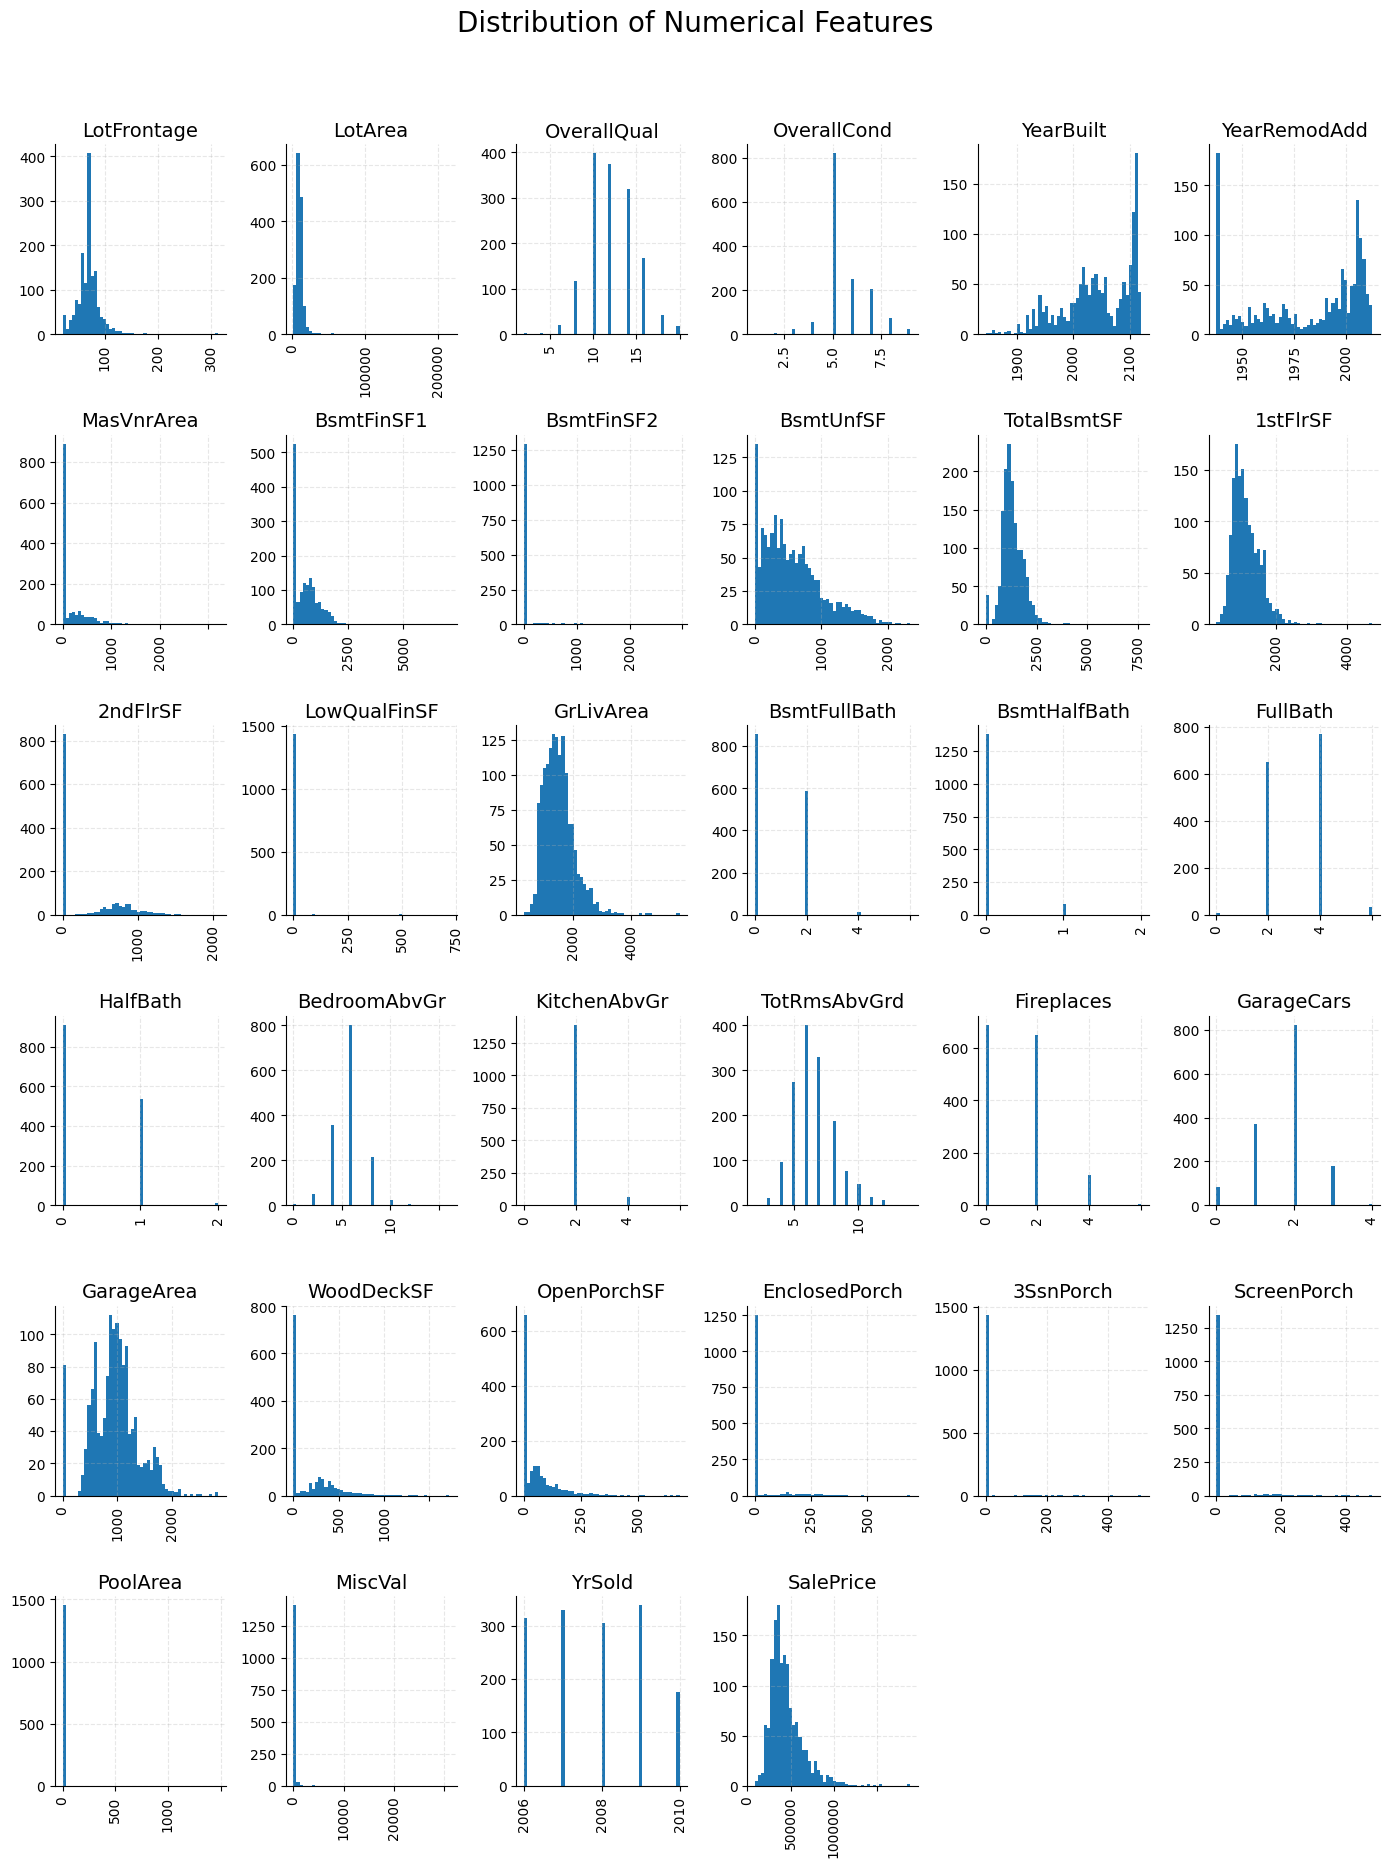

In [71]:
# Univariate Analysis: Visualize individual features using histograms, boxplots, etc.

# Create histograms for each numerical feature
axes = train_num.hist(bins=50, figsize=(14,18))

# Rotate x-tick labels for all subplots
for ax in axes.flatten():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.suptitle("Distribution of Numerical Features", y=1.03)
plt.tight_layout()
plt.show()

In [72]:
# Drop highly skewed features
train_num.drop(["LowQualFinSF", "MiscVal"], axis=1, inplace=True)

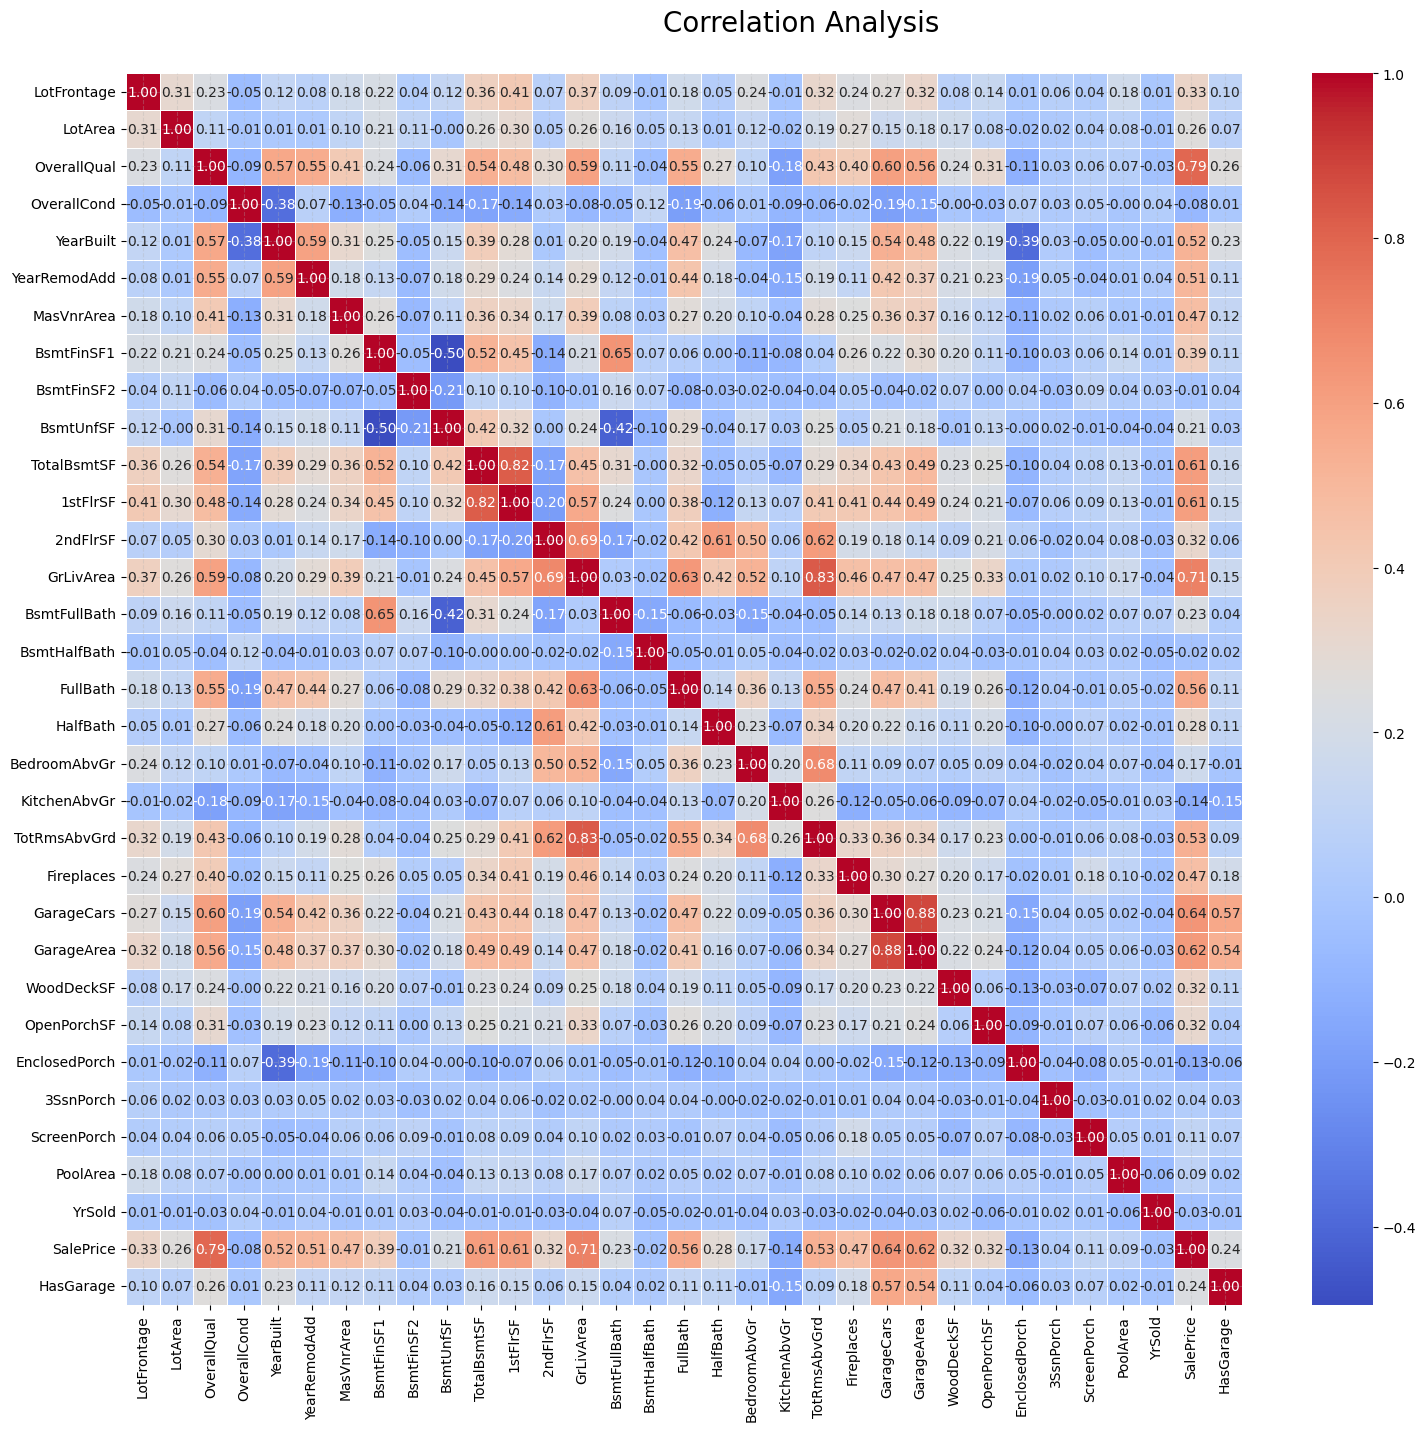

In [73]:
# Correlation Matrix: Check for correlations between features

# Calculate the correlation matrix for the numeric columns
corr_mat = train_num.corr()

# Import seaborn for data visualization
import seaborn as sns

# Set up the figure size for the heatmap
plt.figure(figsize=(18,16))

# Create a heatmap to visualize the correlation matrix
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add a title to the heatmap for context
plt.suptitle("Correlation Analysis", y=0.92)

# Display the heatmap
plt.show()

In [74]:
# Drop features with absolute correlation values less than a threshold, let's say 0.2, with the target "SalePrice"
train_num.drop(["OverallCond"], axis=1, inplace=True)

# Drop highly correlated features too to avoid multicollinearity
train_num.drop(["TotRmsAbvGrd", "GarageArea"], axis=1, inplace=True)

#### 4. Feature Engineering / Transformation

In [75]:
""" Feature Engineering invloves creating new features that can provide additional predictive power. For example, combining existing features like 
    TotalRooms = BedroomAbvGrg + KitchenAbvGrg + TotRmsAbvGrd or creating interaction terms."""

# Create New Features based on domain knowledge

# Calculate the age of the building
train_num["BuildingAge"] = train_num["YrSold"] - train_num["YearBuilt"]

# Calculate if remodification added
train_num["HasRemodAdd"] = (train_num["YrSold"] - train_num["YearRemodAdd"]) > 0

# How long ago the remodification was added
train_num["AgeSinceRemod"] = train_num["YrSold"] - train_num["YearRemodAdd"]

# Create a binary feature if 2nd floor exists
train_num["Has2ndFloor"] = train_num["2ndFlrSF"] > 0

# Calculate total living surface area
train_num["TotalLivSF"] = train_num["TotalBsmtSF"] + train_num["1stFlrSF"] + train_num["2ndFlrSF"] + train_num["GrLivArea"]

# Calculate living to lot surface ratio
train_num["LivingToLotSF"] = train_num["TotalLivSF"] / (train_num["LotArea"] + 1)  # Avoid division by zero

# Calculate total basement baths
train_num["BsmtBath"] = train_num["BsmtFullBath"] + train_num["BsmtHalfBath"] * 0.5

# Calculate total above ground baths
train_num["BathAbvGrg"] = train_num["FullBath"] + train_num["HalfBath"] * 0.5

# Calculate the ratio of bathrooms to bedrooms
train_num["BathBedRatio"] = train_num["BathAbvGrg"] / (train_num["BedroomAbvGr"] + 1)  # Avoid division by zero

# Total Porch Surface Area
train_num["TotalPorchSF"] = train_num['OpenPorchSF'] + train_num['EnclosedPorch'] + train_num['3SsnPorch'] + train_num['ScreenPorch']
# Explanation:
# - 'TotalPorchSF': Sum of various porch areas to represent the total porch surface area.

# Calculate if a pool exists
train_num["HasPool"] = train_num["PoolArea"] > 0

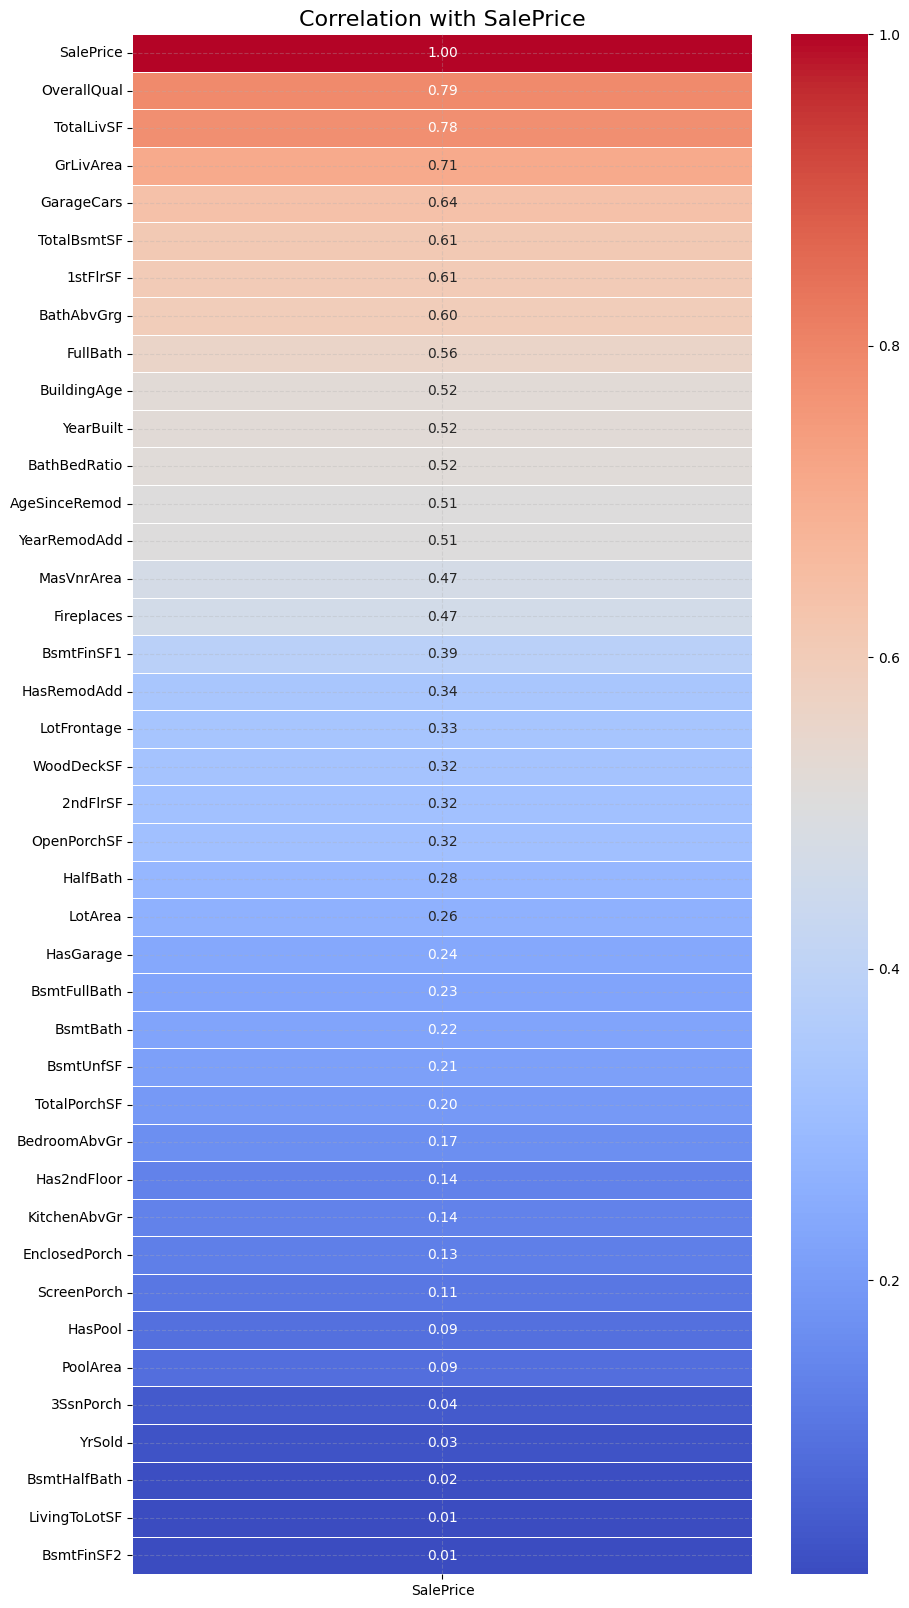

In [76]:
# Correlation Matrix for 'SalePrice'
corr_mat = train_num.corr()

# Filter the correlation matrix to include only SalePrice and its correlations with other features
saleprice_corr = np.abs(corr_mat[['SalePrice']]).sort_values(by='SalePrice', ascending=False)

# Set up the figure size for the heatmap
plt.figure(figsize=(10, 20))

# Create a heatmap to visualize the correlation matrix for SalePrice
sns.heatmap(saleprice_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add a title to the heatmap for context
plt.title("Correlation with SalePrice", fontsize=16)

# Display the heatmap
plt.show()

In [77]:
# Verify if our newly engineered features add any significance to our model and drop insignificant ones
train_num.drop(["YearBuilt", "YearRemodAdd", "BsmtFinSF2",
                "1stFlrSF", "2ndFlrSF", "GrLivArea", "BsmtFullBath", "BsmtHalfBath",
                "FullBath", "HalfBath", "EnclosedPorch", "3SsnPorch", 
                "ScreenPorch", "PoolArea", "YrSold", 'LivingToLotSF'],
                axis=1, inplace=True)

#### 5. Outlier Detection

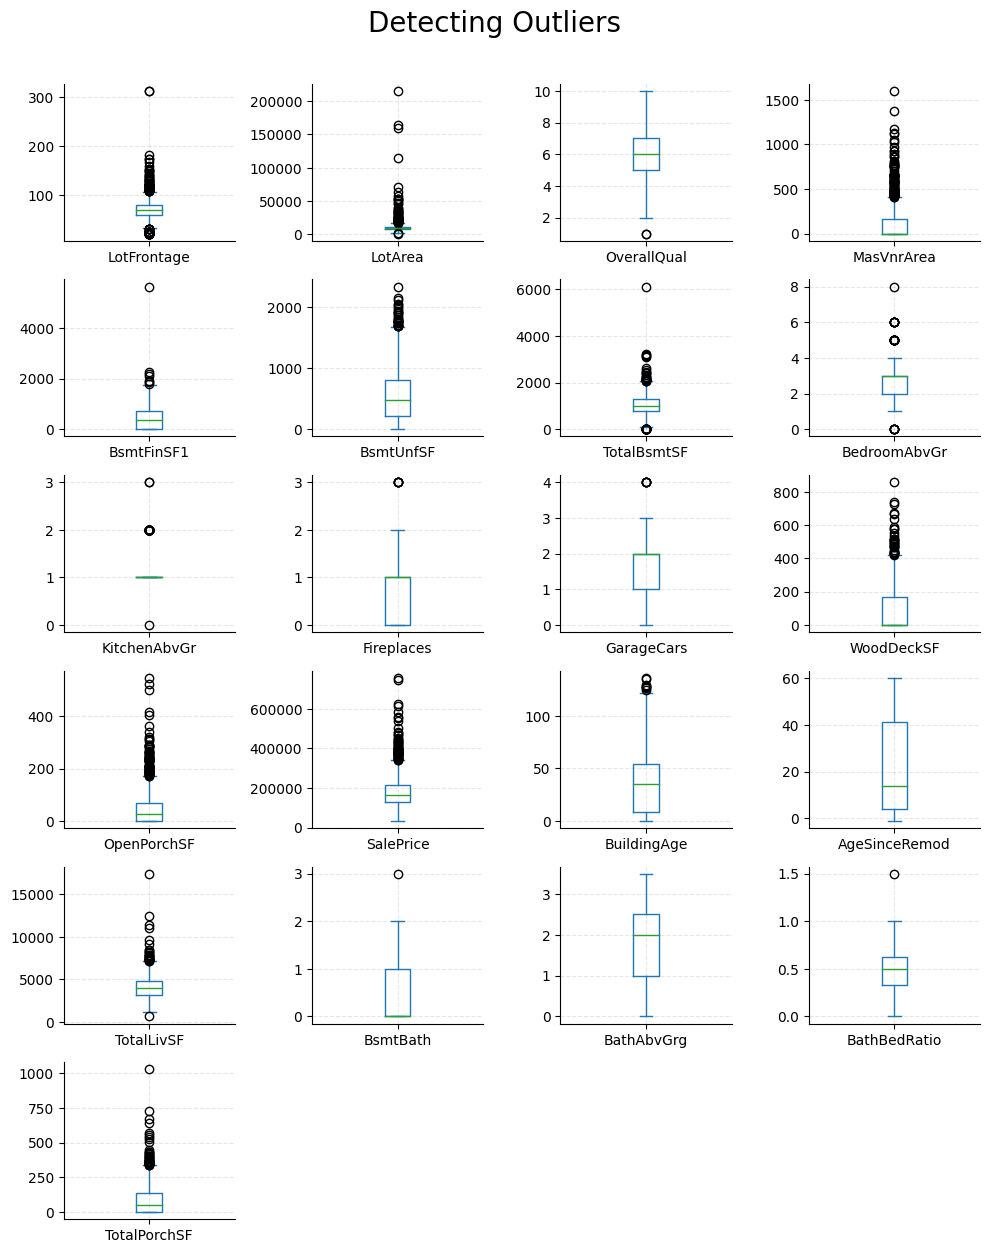

In [78]:
# Visualize Outliers: Use boxplots to detect outliers 

# Create boxplots for each numerical feature to identify outliers 
train_num.plot(kind="box", subplots=True, layout=(8,4), figsize=(10,16), sharex=False, sharey=False) 

# Add a title to the figure 
plt.suptitle("Detecting Outliers", y=1.01) 

# Adjust layout to ensure titles and labels do not overlap 
plt.tight_layout() 

# Display the boxplots 
plt.show()

In [79]:
# Handle Outliers: Decide how to handle outliers (cap, remove, or transform)
# 1. Cap outliers using the interquartile range (IQR) method

def remove_outliers(df, column):
    """
    Removes outliers from a DataFrame column based on the IQR method.

    Args:
        df (pd.DataFrame): DataFrame containing the data.
        column (str): Column name from which to remove outliers.

    Returns:
        pd.DataFrame: DataFrame with outliers removed.
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR
    return df.loc[(df[column] >= lower_bound) & (df[column] <= upper_bound), :]

# Apply the outlier removal function to specific features
for feature in ["Fireplaces", "GarageCars", "BsmtBath"]:
    train_num = remove_outliers(train_num, feature)

# 2. Remove specific outliers based on domain knowledge
train_num = train_num[train_num["LotFrontage"] <= 200]
train_num = train_num[train_num["LotArea"] <= 100000]
train_num = train_num[train_num["SalePrice"] <= 700000]

# 3. Apply logarithmic transformation to handle skewness
for feature in ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1',
                'BsmtUnfSF', 'WoodDeckSF', 'OpenPorchSF', 
                'TotalLivSF', 'TotalPorchSF']:
    train_num[f"Log{feature}"] = train_num[feature].apply(np.log)
    train_num.drop([feature], axis=1, inplace=True)

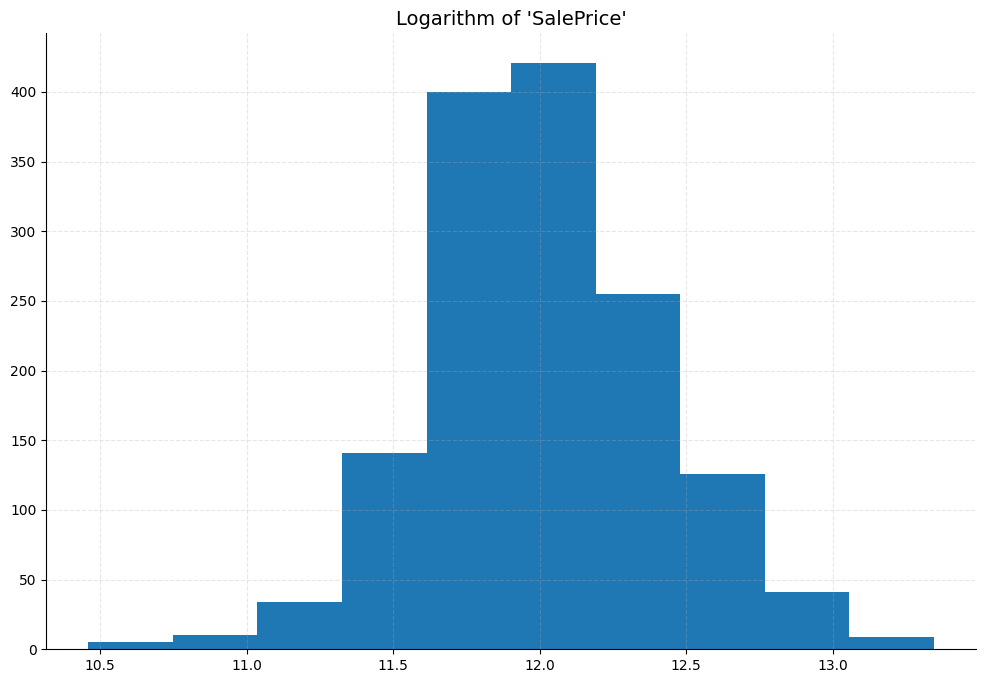

In [80]:
# Transform Target: As the target variable exhibits skewness, apply transformations like scaling, log-transformation, etc. to improve model accuracy and robustness
train_num["SalePrice"] = train["SalePrice"].apply(np.log)

# Plot the histogram of the log-transformed 'SalePrice'
train_num["SalePrice"].hist()

# Add a title to the histogram
plt.title("Logarithm of 'SalePrice'")

# Display the plot
plt.show()

### Categorical Features

#### 1. Print Distributions

In [81]:
# Print distribution of classes within each categorical variable

# Select only the categorical columns from the training dataset
train_cat = train.select_dtypes(exclude="number")

# Loop through each categorical feature and print the value counts
for feature in train_cat.columns:
    print(train[feature].value_counts())  # Print the distribution of classes for the feature
    print("--" * 13)  # Separator for readability
    print("")  # Add an empty line for better spacing

MSSubClass
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: count, dtype: int64
--------------------------

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64
--------------------------

Street
Pave    1454
Grvl       6
Name: count, dtype: int64
--------------------------

LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64
--------------------------

LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64
--------------------------

Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64
--------------------------

LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64
--------------------------

LandSlope
Gtl    1382
Mod      65
Sev      13
Name: count, dtype: int64
---------

In [82]:
# Drop highly skewed features or those with a high number of classes
train_cat.drop(["Street", "Utilities", "LandSlope", "Condition2",
                "RoofMatl", "Heating"], 
                axis=1, inplace=True)

# Explanation:
# - 'Street': Dropped due to high skewness, making it less useful for modeling.
# - 'Utilities': Removed because it has a low variance, with most entries being the same class.
# - 'LandSlope': Dropped for similar reasons; low variance and skewed distribution.
# - 'Condition2': Also has high cardinality, leading to sparse data.
# - 'RoofMatl': Removed due to skewed distribution.
# - 'Heating': High cardinality with many unique categories.

# This step helps in simplifying the model by removing features that might not contribute significantly due to their skewness or high cardinality.

#### 2. Data Cleaning

In [83]:
# Print Missing Values
train_cat.isnull().sum()

MSSubClass         0
MSZoning           0
LotShape           0
LandContour        0
LotConfig          0
Neighborhood       0
Condition1         0
BldgType           0
HouseStyle         0
RoofStyle          0
Exterior1st        0
Exterior2nd        0
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
HeatingQC          0
CentralAir         0
Electrical         1
KitchenQual        0
Functional         0
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PavedDrive         0
Fence           1179
dtype: int64

In [84]:
# Handle Missing Values: Decide how to handle missing values, either drop or replace with the most frequent (mode)

# List of features to impute with the most frequent value (mode)
features_to_impute = ["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", 
                      "Electrical", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "Fence"]

# Loop through each feature and replace missing values with the most frequent value
for feature in features_to_impute:
    # Replace missing values with the most frequent value in the column
    most_frequent_value = train_cat[feature].value_counts().index[0]
    train_cat.loc[train_cat[feature].isnull(), [feature]] = most_frequent_value

# Print the total number of remaining missing values in the categorical dataset
print(f"Missing Values: {train_cat.isnull().sum().sum()}")

Missing Values: 0


In [85]:
# Remove Duplicates: Check and remove duplicates rows if any
train_cat.drop_duplicates(inplace=True)

In [86]:
# Group rare classes within a nominal field into one common class, "other"
""" When working with nominal (categorical) data, it is often beneficial to group infrequent or rare categories into a single,
    aggregated category labeled as "other." This approach helps to simplify the dataset, reduce noise, and improve the stability
    and interpretability of the models. By combining these less common classes, we ensure that the model focuses on the more
    significant patterns and relationships within the data, while still accounting for the presence of the less frequent categories."""

train_cat["Condition1"] = train_cat["Condition1"].apply(lambda x:x if x in ["Norm", "Feedr", "Artery"] else "other")
train_cat["HouseStyle"] = train_cat["HouseStyle"].apply(lambda x:x if x in ["1Story", "2Story", "1.5Fin"] else "other")
train_cat["RoofStyle"] = train_cat["RoofStyle"].apply(lambda x:x if x in ["Gable", "Hip"] else "other")
train_cat["Exterior1st"] = train_cat["Exterior1st"].apply(lambda x:x if x in ["VinylSd", "HdBoard", "MetalSd", "Wd Sdng", "Plywood"] else "other")
train_cat["Exterior2nd"] = train_cat["Exterior2nd"].apply(lambda x:x if x in ["VinylSd", "MetalSd", "HdBoard" "Wd Sdng", "Plywood"] else "other")
train_cat["Electrical"] = train_cat["Electrical"].apply(lambda x:x if x in ["SBrkr"] else "other")
train_cat["Functional"] = train_cat["Functional"].apply(lambda x:x if x in ["Typ"] else "other")
train_cat["GarageType"] = train_cat["GarageType"].apply(lambda x:x if x in ["Attchd", "Detchd", "BuiltIn"] else "other")

#### 3. Data Visualization

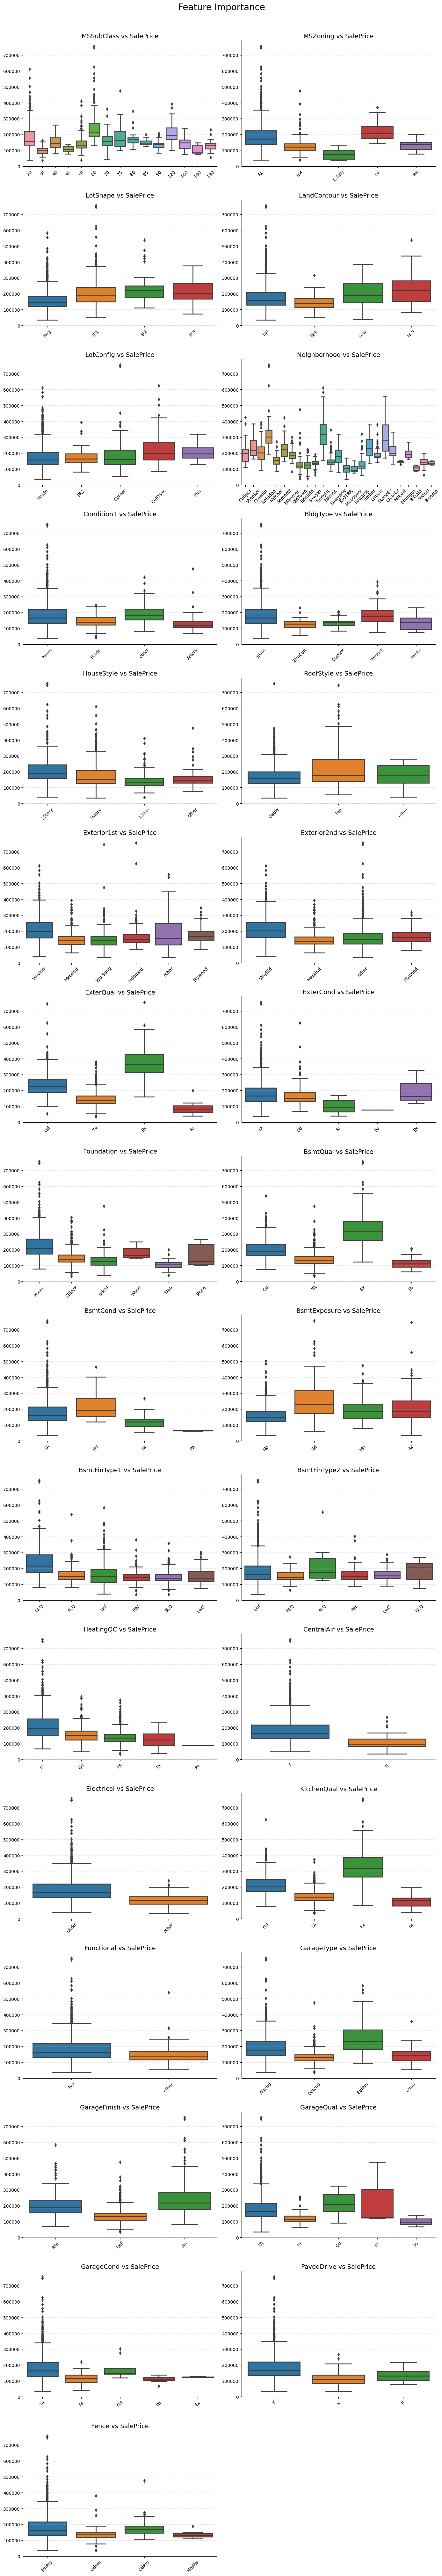

In [87]:
# Visualizing the Relationship Between Categorical Features and Target "SalePrice"

# Add 'SalePrice' to the categorical DataFrame for visualization purposes
train_cat["SalePrice"] = train["SalePrice"]

# Determine the number of categorical columns (excluding 'SalePrice')
col_length = train_cat.shape[1] - 1  # Exclude 'SalePrice'

# Calculate the number of rows needed for the subplots, based on 2 columns per row
nrows = (col_length + 1) // 2

# Create a figure with subplots arranged in a grid
fig, axes = plt.subplots(nrows=nrows, ncols=2, figsize=(14, 5 * nrows))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Loop through each categorical feature and create a boxplot to visualize its relationship with 'SalePrice'
for i, feature in enumerate(train_cat.drop(["SalePrice"], axis=1).columns):
    sns.boxplot(x=feature, y='SalePrice', data=train_cat, ax=axes[i])  # Create a boxplot
    axes[i].set_title(f'{feature} vs SalePrice')  # Set title for the subplot
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability
    axes[i].set_xlabel("")  # Remove x-axis label
    axes[i].set_ylabel("")  # Remove y-axis label

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to ensure subplots do not overlap and are well spaced
plt.tight_layout()

# Add a main title for the figure
plt.suptitle("Feature Importance", y=1.01)

# Display the figure
plt.show()

Analysis of Variance (ANOVA) is a statistical method used to identify the features that have significant differences in their means when grouped by different categories of the target variable. In the context of the Kaggle Housing Prices dataset, the graph above can help us determine which categorical features have a strong relationship with the sale prices of houses.

#### 4. Handling Categorical Variables

Encode Categorical Features: As most ML Algorithms work only with numeric data, we need to find a way to convert categorical columns into numerical ones

In [88]:
# 1. Ordinal Features

ord_cols = ["ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "HeatingQC",
            "KitchenQual", "GarageQual", "GarageCond", "BsmtExposure", "CentralAir"]


# Mapping each quality to a numerical value
quality_dic = {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1}
cond_dic = {"Gd": 4, "Av": 3, "Mn": 2, "No": 1}

# Applying the mappings to the ordinal categorical features
train_cat["ExterQual"] = train_cat["ExterQual"].apply(lambda x: quality_dic.get(x)).astype("int")
train_cat["ExterCond"] = train_cat["ExterCond"].apply(lambda x: quality_dic.get(x)).astype("int")
train_cat["BsmtQual"] = train_cat["BsmtQual"].apply(lambda x: quality_dic.get(x)).astype("int")
train_cat["BsmtCond"] = train_cat["BsmtCond"].apply(lambda x: quality_dic.get(x)).astype("int")
train_cat["HeatingQC"] = train_cat["HeatingQC"].apply(lambda x: quality_dic.get(x)).astype("int")
train_cat["KitchenQual"] = train_cat["KitchenQual"].apply(lambda x: quality_dic.get(x)).astype("int")
train_cat["GarageQual"] = train_cat["GarageQual"].apply(lambda x: quality_dic.get(x)).astype("int")
train_cat["GarageCond"] = train_cat["GarageCond"].apply(lambda x: quality_dic.get(x)).astype("int")

# Applying a different mapping to another ordinal feature
train_cat["BsmtExposure"] = train_cat["BsmtExposure"].apply(lambda x: cond_dic.get(x)).astype("int")

# Mapping CentralAir to binary values
train_cat["CentralAir"] = train_cat["CentralAir"].apply(lambda x: 1 if x == "Y" else 0).astype("int")

# Initialize OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()

# Fit and transform the train_cat ordinal columns
train_cat_ord_encoded = ord_enc.fit_transform(train_cat[ord_cols])

# Convert to DataFrame
train_cat_ord_df = pd.DataFrame(train_cat_ord_encoded, columns=ord_enc.get_feature_names_out())

# Check the first few rows of the newly encoded DataFrame
train_cat_ord_df.head()

,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,KitchenQual,GarageQual,GarageCond,BsmtExposure,CentralAir
0,2.0,2.0,2.0,2.0,4.0,2.0,2.0,2.0,0.0,1.0
1,1.0,2.0,2.0,2.0,4.0,1.0,2.0,2.0,3.0,1.0
2,2.0,2.0,2.0,2.0,4.0,2.0,2.0,2.0,1.0,1.0
3,1.0,2.0,1.0,3.0,3.0,2.0,2.0,2.0,0.0,1.0
4,2.0,2.0,2.0,2.0,4.0,2.0,2.0,2.0,2.0,1.0


In [89]:
# Nominal Features

# Target mean information
""" Here we are implementing target mean encoding for the nominal features.
    Target mean encoding involves replacing each category in a nominal feature with the mean of the target variable (SalePrice) for that category.
    This can help in capturing the effect of categorical variables in a way that is more informative for the model.
    We often use this method for features with a high number of classes, as it helps reduce the dimensionality while retaining valuable information."""

nom_cols_1 = ["MSSubClass", "Neighborhood"]

# Initialize a dictionary to hold the target mean mappings
target_mean_mappings = {}
default_mean = train_cat["SalePrice"].mean()

# Loop through each nominal feature to calculate the target mean and map it
for feature in nom_cols_1:
    # Calculate the target mean for each category
    target_mean = train_cat.groupby(feature)["SalePrice"].mean()
    
    # Store the mapping in the dictionary
    target_mean_mappings[feature] = target_mean
    
    # Map the feature to its target mean in the original DataFrame
    train_cat[feature] = train_cat[feature].map(target_mean_mappings[feature])

# Verify the mapping by displaying the first few rows
train_cat[nom_cols_1].head()

,MSSubClass,Neighborhood
0,241720.401434,197260.302521
1,184281.735521,238772.727273
2,241720.401434,197260.302521
3,166772.416667,210624.725490
4,241720.401434,336902.700000


In [90]:
# One-Hot Encoding: Create a binary column for each category in a categorical feature

# Initialize the OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
oh_enc = OneHotEncoder(sparse_output=False, drop='first')  # Ensure dense array output, drop the first category to avoid multicollinearity

# Select nominal columns by excluding ordinal columns
nom_df = train_cat.drop(ord_cols, axis=1)
nom_cols_2 = nom_df.drop(nom_cols_1, axis=1).columns

# Fit and transform the nominal features in train_cat
train_cat_oh_encoded = oh_enc.fit_transform(train_cat[nom_cols_2].drop("SalePrice", axis=1))

# Convert the encoded array to a DataFrame
train_cat_oh_enc_df = pd.DataFrame(train_cat_oh_encoded, columns=oh_enc.get_feature_names_out())

# Display the first few rows of the newly encoded DataFrame to verify the encoding
train_cat_oh_enc_df.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,...,GarageType_BuiltIn,GarageType_Detchd,GarageType_other,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


## Preparing Data for Machine Learning

The next step is to prepare the dataset by setting up a preprocessing pipeline. This involves handling missing values, encoding categorical variables, scaling numerical features, and applying any necessary transformations. The preprocessing pipeline ensures that all these steps are consistently applied, automating the data preparation process (especially for new data). This not only improves the accuracy and efficiency of our predictive models but also enhnaces reproducibility and reduces the risk of errors.

In [91]:
# Load the original dataset
train, _ = load_housing_data()
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [92]:
# Remove outliers using insights from EDA step

# Apply the outlier removal function to specific features
for feature in ["Fireplaces", "GarageCars"]:
    train_num = remove_outliers(train_num, feature)

# Manual Removal
train = train[train["LotFrontage"] <= 200]
train = train[train["LotArea"] <= 100000]
train = train[train["SalePrice"] <= 700000]

# Remove duplicates
train = train.drop_duplicates()

In [93]:
# Split the data into training features and target
X = train.drop(["SalePrice"], axis=1)
y = train["SalePrice"]

y = y.apply(np.log) # Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally

In [94]:
# Imports
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

In [95]:
# Numerical Features

num_feat = ['LotFrontage', 'LotArea', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 
            'MasVnrArea', "BsmtFinSF1", "BsmtFinSF2", 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 
            'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
            'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageYrBlt', 'GarageCars', "GarageArea", 'WoodDeckSF', 
            'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'YrSold']


# Function to replace 'None' with NaN
def replace_none_with_nan(df):
    """
    Replaces 'None' with NaN in the DataFrame.
    
    Args:
        df (pd.DataFrame): Input DataFrame
    
    Returns:
        pd.DataFrame: DataFrame with 'None' replaced by NaN
    """
    return df.replace('None', pd.NA)


# Function to safely apply logarithm transformation
def safe_log_transform(X, feature):
    """
    Applies logarithm transformation to a feature with safety checks.
    
    Args:
        X (pd.DataFrame): Input DataFrame with numerical features
        feature (str): Feature column to transform
    
    Returns:
        pd.Series: Transformed feature
    """
    X[feature] = X[feature].replace(0, np.nan)  # Replace zeros with NaN to avoid log(0)
    return np.log(X[feature].clip(lower=1e-9))  # Apply log with a very small lower bound

    
# Function to add new features and drop unnecessary ones.
def feature_engineering(X):
    """
    Applies feature engineering to the input array.
    
    Args:
        X (array): Input array with numeric data
    
    Returns:
        pd.DataFrame: DataFrame with new engineered features
    """
    X = X.copy()
    X = pd.DataFrame(X, columns=num_feat)
    
    # Create New Features: Create new features based on domain knowledge
    
    # Calculate the age of the building
    X["BuildingAge"] = X["YrSold"] - X["YearBuilt"]

    # Calculate if remodification added
    X["HasRemodAdd"] = (X["YrSold"] - X["YearRemodAdd"]) > 0

    # How long ago the remodification was added
    X["AgeSinceRemod"] = X["YrSold"] - X["YearRemodAdd"]

    # Create a binary feature if 2nd floor exists
    X["Has2ndFloor"] = X["2ndFlrSF"] > 0

    # Calculate total living surface area
    X["TotalLivSF"] = X["TotalBsmtSF"] + X["1stFlrSF"] + X["2ndFlrSF"] + X["GrLivArea"]

    # Calculate total basement baths
    X["BsmtBath"] = X["BsmtFullBath"] + X["BsmtHalfBath"] * 0.5

    # Calculate total above ground baths
    X["BathAbvGrg"] = X["FullBath"] + X["HalfBath"] * 0.5

    # Calculate the ratio of bathrooms to bedrooms
    X["BathBedRatio"] = X["BathAbvGrg"] / (X["BedroomAbvGr"] + 1)  # Avoid division by zero

    # Total Porch Surface Area
    X["TotalPorchSF"] = X['OpenPorchSF'] + X['EnclosedPorch'] + X['3SsnPorch'] + X['ScreenPorch']

    # Explanation:
    # - 'TotalPorchSF': Sum of various porch areas to represent the total porch surface area.

    # Calculate if a pool exists
    X["HasPool"] = X["PoolArea"] > 0

    # Explanation:
    # - 'HasPool': A boolean feature indicating the presence of a pool.

    # Drop the original columns, if necessary
    X.drop(["YearBuilt", "YearRemodAdd", "BsmtFinSF2",
            "1stFlrSF", "2ndFlrSF", "GrLivArea", "BsmtFullBath", "BsmtHalfBath",
            "FullBath", "HalfBath", "EnclosedPorch", "3SsnPorch", 
            "ScreenPorch", "PoolArea", "YrSold", "TotalBsmtSF", "BedroomAbvGr"],
            axis=1, inplace=True)

    # Apply logarithmic transformation to handle skewness
    for feature in ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1',
                    'BsmtUnfSF', 'WoodDeckSF', 'OpenPorchSF', 
                    'TotalLivSF', 'TotalPorchSF']:
        X[f"Log{feature}"] = safe_log_transform(X, feature)
        X.drop([feature], axis=1, inplace=True)
    
    return X


# Pipeline for preprocessing numerical features
num_pipeline = Pipeline([
    ('replace_none', FunctionTransformer(replace_none_with_nan)),
    ("impute", SimpleImputer(strategy="mean")),  # Handle missing values with mean imputation
    ("feature_engineering", FunctionTransformer(feature_engineering, validate=False)),  # Apply feature engineering
    ("second_impute", SimpleImputer(strategy="mean")),  # Ensure no NaNs remain after feature engineering
    ("scaler", StandardScaler())  # Scale the features
])

In [96]:
# Categorcial Features: Ordinal

ord_feat = ["ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "HeatingQC",
            "KitchenQual", "GarageQual", "GarageCond", "BsmtExposure", "CentralAir"]


# Function to replace 'None' with NaN
def replace_none_with_nan(df):
    """
    Replaces 'None' with NaN in the DataFrame.
    
    Args:
        df (pd.DataFrame): Input DataFrame
    
    Returns:
        pd.DataFrame: DataFrame with 'None' replaced by NaN
    """
    return df.replace('None', pd.NA)


# Function to map quality features to numerical values
def quality_to_number(X):
    """
    Maps ordinal quality features to numerical values.
    
    Args:
        X (array): Input Array with ordinal data
    
    Returns:
        pd.DataFrame: DataFrame with ordinal features mapped to numerical values
    """
    X = X.copy()
    X = pd.DataFrame(X, columns=ord_feat)
    
    quality_mapping = {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1}
    exposure_mapping = {"Gd": 4, "Av": 3, "Mn": 2, "No": 1}

    # Applying the mappings to the ordinal categorical features
    X["ExterQual"] = X["ExterQual"].apply(lambda x: quality_mapping.get(x)).astype("int")
    X["ExterCond"] = X["ExterCond"].apply(lambda x: quality_mapping.get(x)).astype("int")
    X["BsmtQual"] = X["BsmtQual"].apply(lambda x: quality_mapping.get(x)).astype("int")
    X["BsmtCond"] = X["BsmtCond"].apply(lambda x: quality_mapping.get(x)).astype("int")
    X["HeatingQC"] = X["HeatingQC"].apply(lambda x: quality_mapping.get(x)).astype("int")
    X["KitchenQual"] = X["KitchenQual"].apply(lambda x: quality_mapping.get(x)).astype("int")
    X["GarageQual"] = X["GarageQual"].apply(lambda x: quality_mapping.get(x)).astype("int")
    X["GarageCond"] = X["GarageCond"].apply(lambda x: quality_mapping.get(x)).astype("int")

    # Applying a different mapping to the BsmtExposure feature
    X["BsmtExposure"] = X["BsmtExposure"].apply(lambda x: exposure_mapping.get(x)).astype("int")

    # CentralAir mapping to binary values
    X["CentralAir"] = X["CentralAir"].apply(lambda x: 1 if x == "Y" else 0).astype("int")
    
    return X

# Pipeline for preprocessing ordinal categorical features
ord_pipeline = Pipeline([
    ('replace_none', FunctionTransformer(replace_none_with_nan)),  # Replace 'None' with NaN
    ("imputer", SimpleImputer(strategy="most_frequent")),  # Impute missing values with the most frequent value
    ('quality_to_number', FunctionTransformer(quality_to_number)),  # Map quality features to numbers
    ("label_encoder", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1))  # Encode labels
])

In [97]:
# Categorcial Features: Nominal 1

nom_feat_1 = ["MSSubClass", "Neighborhood"]

# Assuming default_mean has already been calculated for the entire DataFrame beforehand
# Example:
default_mean = train_cat["SalePrice"].mean()

# Function to apply target mean encoding with default value for new categories
def target_mean_encoder(X):
    """
    Applies target mean encoding to nominal features, with default value for unmapped categories.
    
    Args:
        X (Array): Input Array with nominal data.
    
    Returns:
        pd.DataFrame: DataFrame with nominal features encoded using target mean.
    """
    X = X.copy()
    X = pd.DataFrame(X, columns=nom_feat_1)

    for feature in X.columns:
        X[feature] = X[feature].map(target_mean_mappings[feature]).fillna(default_mean)
    return X

# Pipeline for preprocessing nominal categorical features
nom_pipeline_1 = Pipeline([
    ('replace_none', FunctionTransformer(replace_none_with_nan)),  # Replace 'None' with NaN
    ("imputer", SimpleImputer(strategy="most_frequent")),  # Impute missing values with the most frequent value
    ("target encoding", FunctionTransformer(target_mean_encoder)),  # Apply target mean encoding
    ("scaler", StandardScaler())  # Scale the features
])

In [98]:
# Categorcial Features: Nominal 2

nom_feat_2 = ['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'Condition1',
              'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd',
              'Foundation', 'BsmtFinType1', 'BsmtFinType2', 'Electrical',
              'Functional', 'GarageType', 'GarageFinish', 'PavedDrive', 'Fence']

# Function to group rare categories into one class, "other"
def group_rare_categories(X):
    """
    Groups rare categories into a single class "other".
    
    Args:
        X (pd.DataFrame): Input DataFrame with nominal features
    
    Returns:
        pd.DataFrame: DataFrame with rare categories grouped into "other"
    """
    X = X.copy()
    X = pd.DataFrame(X, columns=nom_feat_2)
    
    X["Condition1"] = X["Condition1"].apply(lambda x: x if x in ["Norm", "Feedr", "Artery"] else "other")
    X["HouseStyle"] = X["HouseStyle"].apply(lambda x: x if x in ["1Story", "2Story", "1.5Fin"] else "other")
    X["Exterior1st"] = X["Exterior1st"].apply(lambda x: x if x in ["VinylSd", "HdBoard", "MetalSd", "Wd Sdng", "Plywood"] else "other")
    X["Exterior2nd"] = X["Exterior2nd"].apply(lambda x: x if x in ["VinylSd", "MetalSd", "HdBoard", "Wd Sdng", "Plywood"] else "other")
    X["Electrical"] = X["Electrical"].apply(lambda x: x if x in ["SBrkr"] else "other")
    X["Functional"] = X["Functional"].apply(lambda x: x if x in ["Typ"] else "other")
    X["GarageType"] = X["GarageType"].apply(lambda x: x if x in ["Attchd", "Detchd", "BuiltIn"] else "other")

    return X

# Pipeline for preprocessing nominal categorical features
nom_pipeline_2 = Pipeline([
    ('replace_none', FunctionTransformer(replace_none_with_nan)),  # Replace 'None' with NaN
    ("imputer", SimpleImputer(strategy="most_frequent")),  # Impute missing values with the most frequent value
    ("group_rare_categories", FunctionTransformer(group_rare_categories)),  # Group rare categories into "other"
    ("one_hot_encoder", OneHotEncoder(handle_unknown="ignore"))  # One-hot encode categorical features
])

In [99]:
# Combine pipelines for numerical and categorical features
from sklearn.compose import ColumnTransformer

# Create a ColumnTransformer to combine all preprocessing pipelines
preprocessor = ColumnTransformer([
        ("numeric_features", num_pipeline, num_feat),  # Pipeline for numerical features
        ("ordinal_categorical_features", ord_pipeline, ord_feat),  # Pipeline for ordinal categorical features
        ("nominal_categorical_features_1", nom_pipeline_1, nom_feat_1),  # Pipeline for nominal categorical features
        ("nominal_categorical_features_2", nom_pipeline_2, nom_feat_2)  # Pipeline for nominal categorical features
    ], 
    remainder="drop")  # Drop any columns not specified in the pipelines

In [100]:
# Fit and transform the data using the combined preprocessing pipeline

# Assuming 'X' is your feature DataFrame
preprocessor.fit_transform(X)

array([[-0.51305663, -0.22273357, -0.91097128, ...,  0.        ,
         1.        ,  0.        ],
       [ 2.22629931, -0.22273357,  0.69836646, ...,  0.        ,
         1.        ,  0.        ],
       [-0.51305663, -0.22273357,  0.69836646, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 3.13941795, -0.22273357,  2.3077042 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.40006202, -0.22273357, -0.91097128, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.40006202, -0.22273357, -0.91097128, ...,  0.        ,
         1.        ,  0.        ]])

## Model Building and Training

We will start with a simple baseline model, such as linear regression, to establish a reference point for our predictions. This step will include model fitting, making predictions, and evaluating basic evaluation metrics such as Root Mean Squared Error (RMSE). Subsequent models will build up on the baseline by incorporating more sophisticated algorithms like Random Forests, Gradient Boosting, or even Neural Networks. We will focus on feature selection, hyperparameter tuning, and cross-validation to improve model performance.

Evaluating model performance is crucial to understanding its effectiveness. We will use metrics like RMSE, MAE, and R^2 score to compare different models and select the best one. We will also use visualization techniques such as residual plots.

### 1. Baseline Model

In [101]:
# Linear Regression Model
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.pipeline import make_pipeline

# Initialize the Linear Regression model
linear_regression_model = LinearRegression()

# Create a pipeline that combines the preprocessor and the Linear Regression model
linear_regression_pipeline = make_pipeline(preprocessor, linear_regression_model)

# Fit the pipeline to the data
linear_regression_pipeline.fit(X, y)

# Explanation:
# - `LinearRegression`: Imports the Linear Regression model from scikit-learn.
# - `make_pipeline`: Imports the function to create a pipeline.
# - `linear_regression_model`: Initializes the Linear Regression model.
# - `linear_regression_pipeline`: Combines the preprocessing steps (preprocessor) with the Linear Regression model.
# - `fit(X, y)`: Fits the entire pipeline to the feature data `X` and target variable `y`, applying all preprocessing steps before fitting the model.

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric_features',
                                                  Pipeline(steps=[('replace_none',
                                                                   FunctionTransformer(func=<function replace_none_with_nan at 0x7d6bb2c68dc0>)),
                                                                  ('impute',
                                                                   SimpleImputer()),
                                                                  ('feature_engineering',
                                                                   FunctionTransformer(func=<function feature_engineering at 0x7d6bb2c68790>)),
                                                                  ('second_impute',
                                                                   SimpleImputer(...
                                                                  ('one_hot_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['MSZoning', 'LotShape',
                                                   'LandContour', 'LotConfig',
                                                   'Condition1', 'BldgType',
                                                   'HouseStyle', 'RoofStyle',
                                                   'Exterior1st', 'Exterior2nd',
                                                   'Foundation', 'BsmtFinType1',
                                                   'BsmtFinType2', 'Electrical',
                                                   'Functional', 'GarageType',
                                                   'GarageFinish', 'PavedDrive',
                                                   'Fence'])])),
                ('linearregression', LinearRegression())])

In [102]:
# Evaluate the Linear Regression model on the training data

# Predict the target variable using the linear regression pipeline
y_pred = linear_regression_pipeline.predict(X)

# Import mean_squared_error for evaluating the model
from sklearn.metrics import mean_squared_error

# Calculate the Root Mean Squared Error (RMSE) for the predictions
rmse = np.sqrt(mean_squared_error(y, y_pred))

# Print the RMSE to evaluate model performance
print(f"Ridge Regression RMSE: {rmse:.2f}")

Ridge Regression RMSE: 0.11


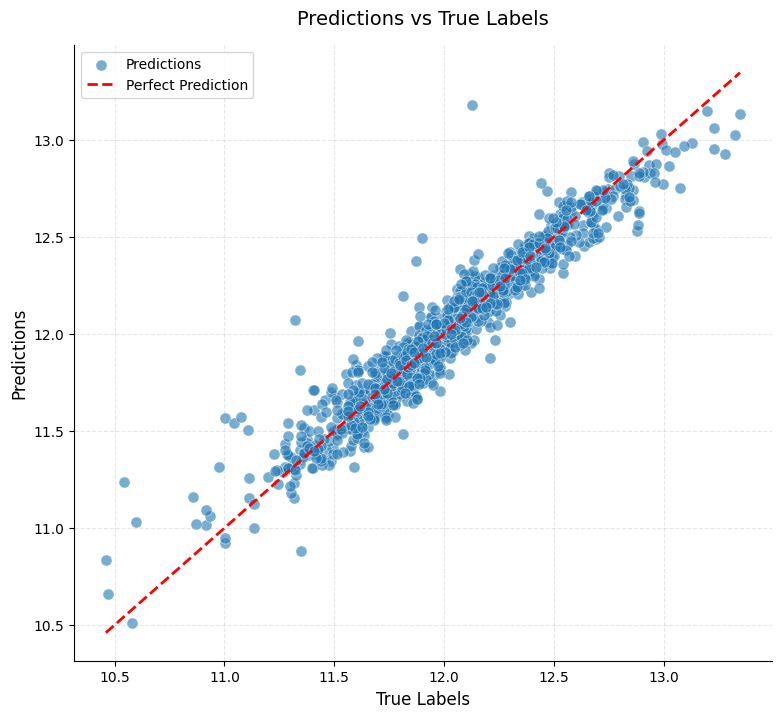

In [103]:
# Visualize and compare "Predictions" with "True Values"

# Create a scatter plot to compare predictions with true labels
plt.figure(figsize=(9, 8))
plt.scatter(y, y_pred, label='Predictions', alpha=0.6, edgecolors='w', linewidth=0.5)

# Add a line to represent perfect prediction
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--', label='Perfect Prediction')

# Add titles and labels
plt.title('Predictions vs True Labels', y=1.02)
plt.xlabel('True Labels')
plt.ylabel('Predictions')

# Add a legend
plt.legend()

# Show the plot
plt.show()

 The closer your points are to the red line, the better your predictions.

### 2. Better Evaluation Using Cross Validation

In [104]:
# Calculate cross-validation scores for the Linear Regression Model to evaluate the generalization ability of the model
from sklearn.model_selection import cross_val_score

# Perform cross-validation and calculate negative mean squared error for each fold
cv_results = cross_val_score(linear_regression_pipeline, X, y, cv=3, n_jobs=-1, scoring="neg_mean_squared_error")

# Convert negative MSE scores to positive and compute RMSE
mse_scores = -cv_results
rmse_scores = np.sqrt(mse_scores)

# Print the RMSE scores and their statistics
print("RMSE Scores:", rmse_scores)
print("RMSE Scores Mean:", rmse_scores.mean())
print("RMSE Scores Standard Deviation:", rmse_scores.std())

# Explanation:
# - `cross_val_score`: Imports the function to perform cross-validation.
# - `linear_regression_pipeline`: The pipeline combining preprocessing and the Linear Regression model.
# - `cv=3`: Specifies 3-fold cross-validation.
# - `n_jobs=-1`: Uses all available processors to parallelize the computation.
# - `scoring="neg_mean_squared_error"`: Specifies the scoring metric as negative mean squared error.
# - `mse_scores = -cv_results`: Converts negative MSE scores to positive.
# - `rmse_scores = np.sqrt(mse_scores)`: Computes the Root Mean Squared Error (RMSE) from the MSE scores.
# - `print("RMSE Scores:", rmse_scores)`: Prints the RMSE scores for each fold.
# - `print("RMSE Scores Mean:", rmse_scores.mean())`: Prints the mean of the RMSE scores.
# - `print("RMSE Scores Standard Deviation:", rmse_scores.std())`: Prints the standard deviation of the RMSE scores.

RMSE Scores: [0.12422411 0.13973139 0.12567605]
RMSE Scores Mean: 0.12987718299024256
RMSE Scores Standard Deviation: 0.006993142792506671


### 3. Training Advanced Models

In [105]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

# Initialize the models to evaluate
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=0.9),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Support Vector Machine": SVR(),
    "XGB Regressor": XGBRegressor()
}

# Train and evaluate each model using cross-validation
results = {}
for model_name, model in models.items():
    # Create a pipeline for each model with preprocessing and the model itself
    pipeline = make_pipeline(preprocessor, model)
    # Perform cross-validation and calculate negative mean squared error for each fold
    cv_results = cross_val_score(pipeline, X, y, scoring="neg_mean_squared_error", cv=3, n_jobs=-1)
    # Convert negative MSE scores to positive and compute RMSE
    mse_scores = -cv_results
    rmse_scores = np.sqrt(mse_scores)
    # Store the RMSE scores in the results dictionary
    results[model_name] = rmse_scores

# Convert the results dictionary to a DataFrame
df_results = pd.DataFrame(results)

# Compute summary statistics for the RMSE scores
df_summary = df_results.describe().transpose()
df_summary['Mean RMSE'] = df_summary['mean']
df_summary['STD RMSE'] = df_summary['std']

# Print the mean and standard deviation of RMSE scores for each model
print(df_summary[['Mean RMSE', 'STD RMSE']])

# Explanation:
# - `models`: Dictionary containing different regression models to be evaluated.
# - `results`: Dictionary to store RMSE scores for each model.
# - `make_pipeline(preprocessor, model)`: Combines preprocessing steps with the model in a pipeline.
# - `cross_val_score(pipeline, X, y, scoring="neg_mean_squared_error", cv=3, n_jobs=-1)`: Performs cross-validation with negative mean squared error as the scoring metric.
# - `-cv_results`: Converts negative MSE scores to positive.
# - `np.sqrt(mse_scores)`: Computes the Root Mean Squared Error (RMSE) from the MSE scores.
# - `pd.DataFrame(results)`: Converts the results dictionary to a DataFrame.
# - `df_summary = df_results.describe().transpose()`: Computes summary statistics and transposes the DataFrame for readability.
# - `df_summary['Mean RMSE']`: Adds a column for the mean RMSE.
# - `df_summary['STD RMSE']`: Adds a column for the standard deviation of RMSE.
# - `print(df_summary[['Mean RMSE', 'STD RMSE']])`: Prints the mean and standard deviation of RMSE scores for each model.

                        Mean RMSE  STD RMSE
Linear Regression        0.129877  0.008565
Ridge Regression         0.128782  0.008943
Decision Tree            0.225106  0.014487
Random Forest            0.143309  0.011208
Support Vector Machine   0.138044  0.011892
XGB Regressor            0.143314  0.008798


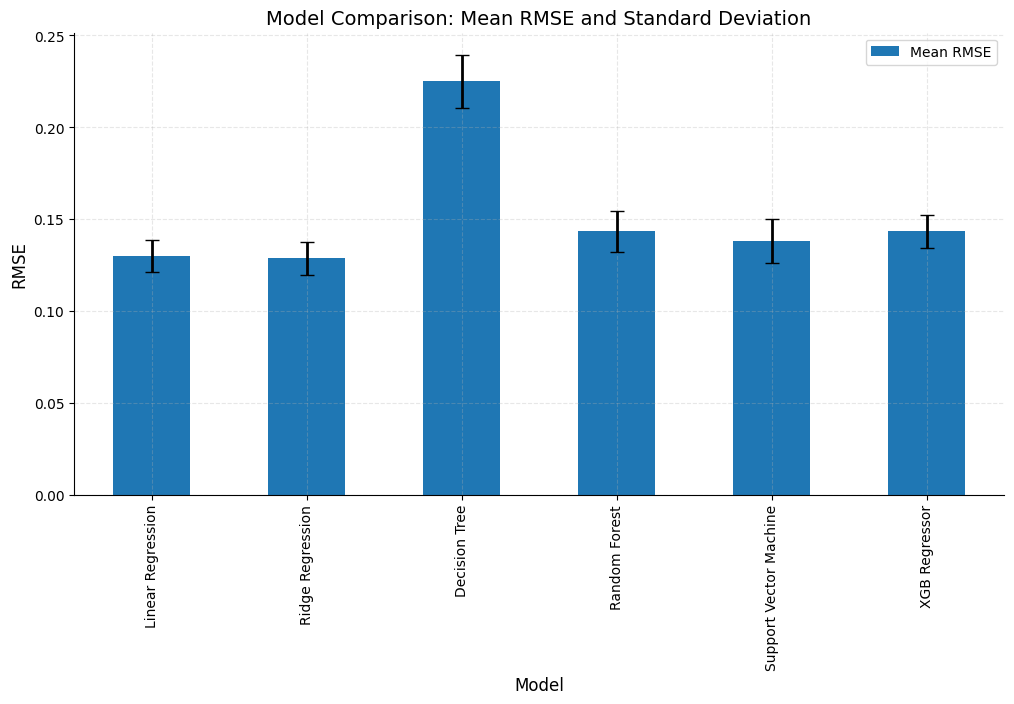

In [106]:
# Visualize the results, compare models visually
plt.figure(figsize=(12, 6))
df_summary[['Mean RMSE', 'STD RMSE']].plot(kind='bar', yerr='STD RMSE', capsize=5, ax=plt.gca())

plt.title('Model Comparison: Mean RMSE and Standard Deviation')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.show()

### 4. Hyperparameter Tuning

Next, let's finetune the top performing models for better results.

In [107]:
# Make imports
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [108]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
import numpy as np

# Define the parameter grid for GridSearchCV
ridge_params_grid = {
    "ridge__alpha": [0.1, 1.0, 10.0],
    "ridge__solver": ["auto", "svd", "cholesky"]
}

# Create a pipeline that includes preprocessing and the Ridge regressor
ridge_pipeline = make_pipeline(preprocessor, Ridge())

# Initialize GridSearchCV with the pipeline and parameter grid
ridge_grid_search_cv = GridSearchCV(
    estimator=ridge_pipeline,
    param_grid=ridge_params_grid,
    scoring="neg_mean_squared_error",
    cv=3,
    refit=True,
    n_jobs=-1
)

# Fit GridSearchCV to the data
ridge_grid_search_cv.fit(X, y)

# Display the best RMSE score and the best hyperparameters
best_rmse = np.sqrt(-ridge_grid_search_cv.best_score_)
best_params = ridge_grid_search_cv.best_params_

print(f"Best RMSE Score: {best_rmse:.2f}")
print(f"Best Parameters: {best_params}")

Best RMSE Score: 0.13
Best Parameters: {'ridge__alpha': 10.0, 'ridge__solver': 'svd'}


In [109]:
# XGB Regressor Model Hyperparameter Tuning using RandomizedSearchCV

# Define the parameter distributions for RandomizedSearchCV
xgb_param_distributions = {
    "xgbregressor__n_estimators": np.random.randint(100, 501, size=100),  # Discrete uniform distribution for n_estimators
    "xgbregressor__max_depth": np.random.randint(5, 13, size=100),  # Discrete uniform distribution for max_depth
    "xgbregressor__learning_rate": np.random.uniform(0.01, 0.3, size=100)  # Continuous uniform distribution for learning_rate
}

# Create a pipeline that includes preprocessing and the XGBRegressor
xgb_pipeline = make_pipeline(preprocessor, XGBRegressor())

# Initialize RandomizedSearchCV with the pipeline and parameter distributions
xgb_randomized_search_cv = RandomizedSearchCV(
    estimator=xgb_pipeline,
    param_distributions=xgb_param_distributions,
    scoring="neg_mean_squared_error",
    cv=3,
    n_iter=10,
    refit=True,
    n_jobs=-1
)

# Fit RandomizedSearchCV to the data
xgb_randomized_search_cv.fit(X, y)

# Display the best RMSE score and the best hyperparameters
best_xgb_rmse = np.sqrt(-xgb_randomized_search_cv.best_score_)
best_xgb_params = xgb_randomized_search_cv.best_params_

print(f"Best RMSE Score: {best_xgb_rmse:.2f}")
print(f"Best Parameters: {best_xgb_params}")

Best RMSE Score: 0.14
Best Parameters: {'xgbregressor__n_estimators': 117, 'xgbregressor__max_depth': 5, 'xgbregressor__learning_rate': 0.22860106303895822}


## Neural Networks

As we advance in our journey to predict housing prices, we delve into the fascinating world of deep learning and neural networks. Unlike traditional machine learning models, deep learning models, particularly neural networks, can capture complex patterns and relationships within the data due to their layered architecture.

Neural networks consist of interconnected nodes (neurons) organized into layers—an input layer, one or more hidden layers, and an output layer. Each neuron processes input data and passes it on to subsequent layers, allowing the model to learn hierarchical representations of the data. This capability makes neural networks particularly powerful for capturing non-linear relationships and interactions among features, which are often present in real-world datasets like housing prices.

In this section, we will explore how to design, train, and evaluate neural network models with **PyTorch** to enhance our predictions of housing prices, leveraging the depth and flexibility of deep learning to achieve more accurate results.

In [117]:
import torch
import torch.nn.functional as F

# Define a Linear Model using PyTorch's nn.Module
class LinearModel(torch.nn.Module):
    def __init__(self, in_units, out_units=1):
        """
        Initialize the layers of the linear model.
        
        Args:
            in_units (int): Number of input features.
            out_units (int): Number of output features (default is 1).
        """
        super().__init__()
        self.fc1 = torch.nn.Linear(in_units, 16)  # First fully connected layer with 16 units
        self.fc2 = torch.nn.Linear(16, 8)         # Second fully connected layer with 8 units
        self.fc3 = torch.nn.Linear(8, out_units)  # Output layer

    
    def forward(self, x):
        """
        Define the forward pass of the model.
        
        Args:
            x (torch.Tensor): Input tensor
        
        Returns:
            torch.Tensor: Output tensor after applying the layers and activations
        """
        x = F.relu(self.fc1(x))  # Apply ReLU activation to the first layer
        x = F.relu(self.fc2(x))  # Apply ReLU activation to the second layer
        x = self.fc3(x)          # Output layer without activation for regression
        return x

In [118]:
# Check the input shape
in_units = preprocessor.transform(X).shape[1]

# Initialize the Model
lin_model = LinearModel(in_units=in_units, out_units=1)

# Initialize the Optimizer
optimizer = torch.optim.SGD(params=lin_model.parameters(), lr=0.001, momentum=0.9, weight_decay=0.0001)

# Initialize the Loss Function
criterion = torch.nn.MSELoss()

# Explanation:
# - `LinearModel(in_units=in_units, out_units=1)`: Initializes the linear model with the input units from the preprocessed data and 1 output unit.
# - `torch.optim.SGD(...)`: Initializes the SGD optimizer with a learning rate of 0.01, momentum of 0.9, and weight decay of 0.0001.
# - `torch.nn.MSELoss()`: Initializes the MSE loss function, which measures the average squared difference between the predicted and actual values.

In [119]:
# Split the data into training and testing datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the training data
X_train = torch.tensor(preprocessor.fit_transform(X_train), dtype=torch.float32)
y_train = torch.tensor(y_train.to_numpy(), dtype=torch.float32).unsqueeze(1)  # Convert to tensor and add an extra dimension for a column vector

# Preprocess the testing data
X_test = torch.tensor(preprocessor.transform(X_test), dtype=torch.float32)
y_test = torch.tensor(y_test.to_numpy(), dtype=torch.float32).unsqueeze(1)  # Convert to tensor and add an extra dimension for a column vector

In [122]:
# Training loop for the linear model
n_epochs = 20  # Number of epochs for training

# Loop over epochs
for epoch in range(n_epochs):
    lin_model.train()  # Set the model to training mode
    for data, target in zip(X_train, y_train):
        output = lin_model(data)  # Forward pass: compute predicted outputs by passing inputs to the model
        optimizer.zero_grad()  # Clear the gradients of all optimized variables
        loss = criterion(output, target)  # Compute the loss
        loss.backward()  # Backpropagate the error
        optimizer.step()  # Update model parameters

    # Evaluate model performance on training and test data
    lin_model.eval()  # Set the model to evaluation mode
    with torch.no_grad():  # Disable gradient computation for evaluation
        # Compute training loss
        train_predictions = lin_model(X_train)
        train_loss = criterion(train_predictions, y_train).item()  # Convert to scalar

        # Compute test loss
        test_predictions = lin_model(X_test)
        test_loss = criterion(test_predictions, y_test).item()  # Convert to scalar
        
        # Print epoch number, training loss, and test loss
        print(f"Epoch {epoch+1}/{n_epochs},  Training Loss: {train_loss:.4f},  Test Loss: {test_loss:.4f}")

Epoch 1/20,  Training Loss: 0.0160,  Test Loss: 0.0190
Epoch 2/20,  Training Loss: 0.0158,  Test Loss: 0.0188
Epoch 3/20,  Training Loss: 0.0153,  Test Loss: 0.0185
Epoch 4/20,  Training Loss: 0.0148,  Test Loss: 0.0181
Epoch 5/20,  Training Loss: 0.0148,  Test Loss: 0.0182
Epoch 6/20,  Training Loss: 0.0183,  Test Loss: 0.0205
Epoch 7/20,  Training Loss: 0.0154,  Test Loss: 0.0186
Epoch 8/20,  Training Loss: 0.0149,  Test Loss: 0.0183
Epoch 9/20,  Training Loss: 0.0142,  Test Loss: 0.0184
Epoch 10/20,  Training Loss: 0.0147,  Test Loss: 0.0184
Epoch 11/20,  Training Loss: 0.0146,  Test Loss: 0.0187
Epoch 12/20,  Training Loss: 0.0143,  Test Loss: 0.0182
Epoch 13/20,  Training Loss: 0.0145,  Test Loss: 0.0185
Epoch 14/20,  Training Loss: 0.0264,  Test Loss: 0.0237
Epoch 15/20,  Training Loss: 0.0164,  Test Loss: 0.0193
Epoch 16/20,  Training Loss: 0.0160,  Test Loss: 0.0197
Epoch 17/20,  Training Loss: 0.0161,  Test Loss: 0.0205
Epoch 18/20,  Training Loss: 0.0145,  Test Loss: 0.0201
E

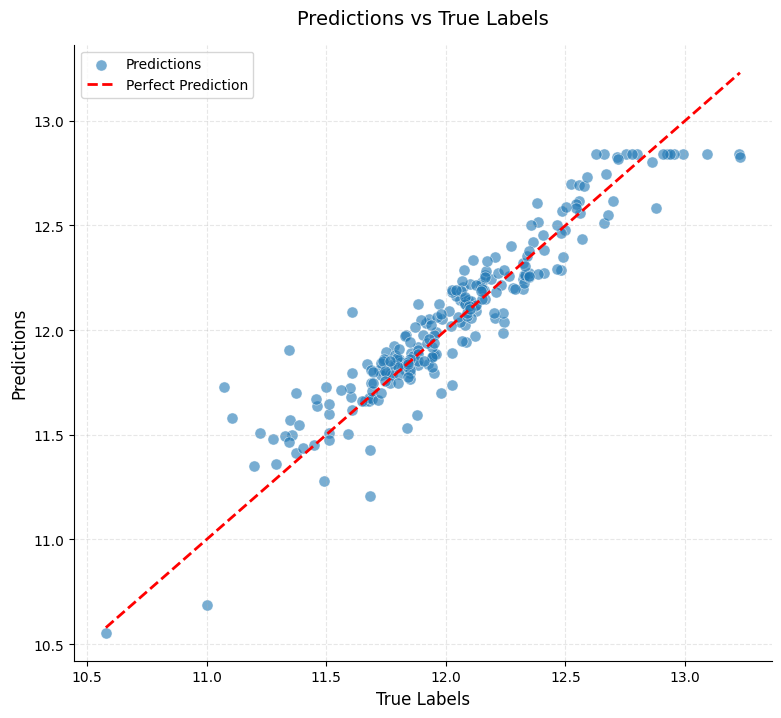

In [123]:
# Compare "Predictions" with "True Values" Visually

# Compute the predictions using the linear model on the test set
y_pred = lin_model(X_test).detach().numpy()
y_true = y_test.detach().numpy()

# Create a scatter plot to compare predictions with true labels
plt.figure(figsize=(9, 8))
plt.scatter(y_true, y_pred, label='Predictions', alpha=0.6, edgecolors='w', linewidth=0.5)

# Add a line to represent perfect prediction
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', linestyle='--', label='Perfect Prediction')

# Add titles and labels
plt.title('Predictions vs True Labels', y=1.02)
plt.xlabel('True Labels')
plt.ylabel('Predictions')

# Add legend
plt.legend()
plt.show()

In [124]:
# Import mean_squared_error for evaluating the model
from sklearn.metrics import mean_squared_error

# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

Root Mean Squared Error (RMSE): 0.1432


## Submit Predictions

In [125]:
# Generate predictions using the trained linear model
# output = np.exp(lin_model(torch.tensor(preprocessor.transform(test), dtype=torch.float32)).detach().numpy())


# Generate predictions using the Ridge regression pipeline
ridge_pipeline = make_pipeline(preprocessor, Ridge(alpha=0.1, solver='svd'))
ridge_pipeline.fit(X, y)  # Ensure to fit the pipeline before making predictions

output = np.exp(ridge_pipeline.predict(test))

# Update the sample submission file with the predictions
sample_submission_df = pd.read_csv('../input/house-prices-advanced-regression-techniques/sample_submission.csv')
sample_submission_df['SalePrice'] = output

# Save the updated sample submission to a new CSV file
sample_submission_df.to_csv('/kaggle/working/submission.csv', index=False)

# Display the first few rows of the updated sample submission
pd.read_csv('/kaggle/working/submission.csv').head()

,Id,SalePrice
0,1461,114685.194364
1,1462,154738.353593
2,1463,195694.269331
3,1464,198729.079691
4,1465,195963.807512
